In [2]:
# pandasのimport
import pandas as pd
# fbprophetのimport
from fbprophet import Prophet
# ツイートのCSVデータの読み込み
df = pd.read_csv("NoCode_2020-05-28-23-25.csv")

In [3]:
# 最初の5行を取得
df.head()
# 行数・列数を取得
df.shape

(8786, 7)

In [4]:
# データの整形
# 日時といいね数の列を取り出して新しいDataFrameを作る。
df = df.loc[:,['日時','いいね数']]
df.head()

,日時,いいね数
0,2020-05-28 23:09:49,3
1,2020-05-28 23:07:05,1
2,2020-05-28 23:06:47,1
3,2020-05-28 23:06:35,1
4,2020-05-28 23:04:56,3


In [5]:
# 日時をdatetime型にする
df['日時'] = pd.to_datetime(df['日時'])
print(df['日時'].dtype)

datetime64[ns]


In [6]:
#　日付が同じデータを足してまとめる
df = df.resample('D', on='日時').sum()
df.head()

,いいね数
日時,
2020-04-16,1058
2020-04-17,939
2020-04-18,1243
2020-04-19,1125
2020-04-20,1049


In [7]:
# 通常の0から始まるindexを追加
df = df.reset_index()
df.head()

,日時,いいね数
0,2020-04-16,1058
1,2020-04-17,939
2,2020-04-18,1243
3,2020-04-19,1125
4,2020-04-20,1049


In [8]:
# prophetの予測のために、dsとyをカラム名に設定
df = df.rename(columns={'日時':'ds','いいね数':'y'})
df.head()

,ds,y
0,2020-04-16,1058
1,2020-04-17,939
2,2020-04-18,1243
3,2020-04-19,1125
4,2020-04-20,1049


In [9]:
# protphetのインスタンスを作成
m = Prophet()

In [10]:
# データを元に学習
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
# 予測する分のデータフレームの作成
future = m.make_future_dataframe(periods=60)
# 後ろから5行を表示
future.tail()

,ds
98,2020-07-23
99,2020-07-24
100,2020-07-25
101,2020-07-26
102,2020-07-27


In [12]:
# 予測する
forecast = m.predict(future)

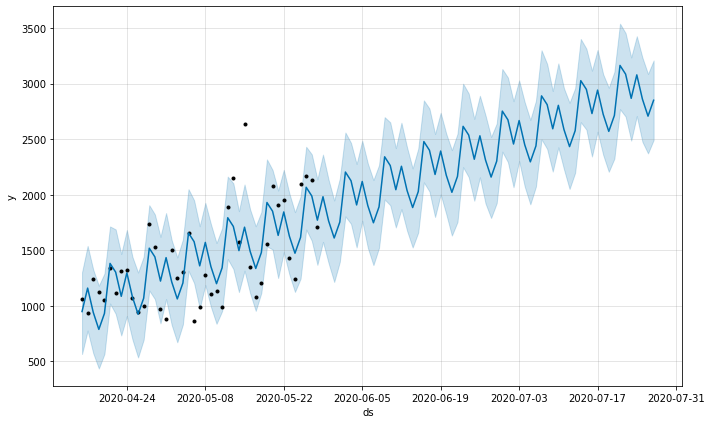

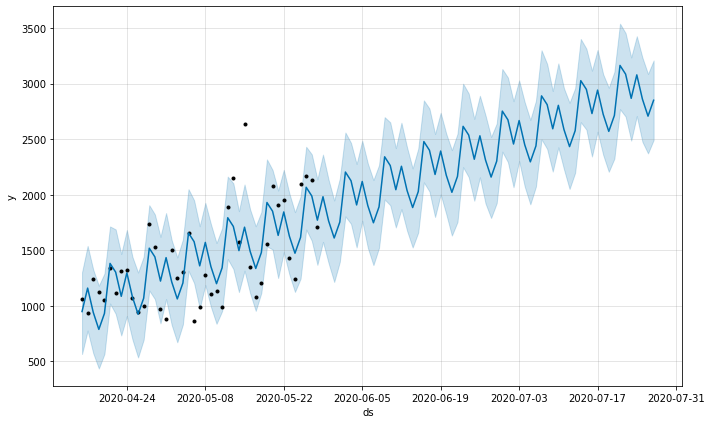

In [13]:
# 予測データの描画
m.plot(forecast)

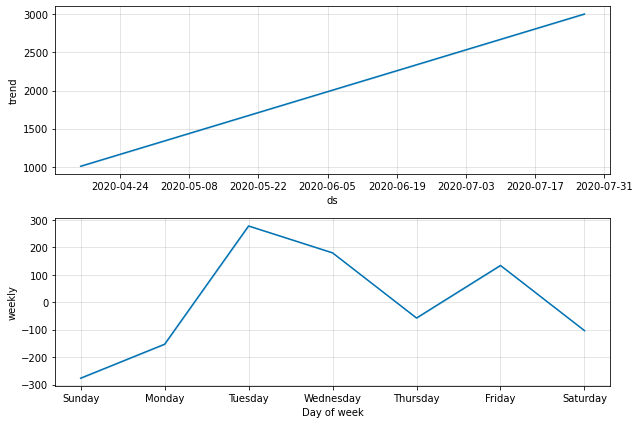

In [14]:
# 予測データのトレンドや周期性を描画
fig2 = m.plot_components(forecast)

In [15]:
# plotlyのimport
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [ ]:
# 予測データをインタラクティブに描画
fig1 = plot_plotly(m, forecast)
py.plot(fig1)